In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving F.csv to F.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['F.csv']))
print(df)

           Date   Open   High    Low  Close  Adj Close
0      1/4/2010  10.17  10.28  10.05  10.28   6.076669
1      1/5/2010  10.45  11.24  10.40  10.96   6.478625
2      1/6/2010  11.21  11.46  11.13  11.37   6.720985
3      1/7/2010  11.46  11.69  11.32  11.66   6.892406
4      1/8/2010  11.67  11.74  11.46  11.69   6.910141
...         ...    ...    ...    ...    ...        ...
3390  6/23/2023  13.93  14.15  13.92  14.02  13.656098
3391  6/26/2023  14.01  14.23  13.99  14.11  13.743761
3392  6/27/2023  14.19  14.46  14.06  14.41  14.035975
3393  6/28/2023  14.39  14.79  14.37  14.79  14.406112
3394  6/29/2023  14.87  15.13  14.79  14.95  14.561959

[3395 rows x 6 columns]


In [5]:
data_training = df[df['Date'] < '2023-03-15'].copy()
data_testing = df[df['Date'] >= '2023-03-15'].copy()

In [6]:
data_training = data_training.drop(['Date'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.19452054, 0.18376962, 0.19414743, 0.19143166, 0.03252637],
       [0.209863  , 0.2340314 , 0.21384354, 0.22830801, 0.05683154],
       [0.25150684, 0.24554973, 0.25492401, 0.25054229, 0.07148639],
       ...,
       [0.28493149, 0.27277485, 0.28981428, 0.27819955, 0.35616115],
       [0.29369861, 0.2958115 , 0.30163195, 0.28796094, 0.36663203],
       [0.29863012, 0.28324606, 0.30444568, 0.28850324, 0.36721372]])

In [8]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(1315, 60, 5)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
42/42 [==============================] - 9s 116ms/step - loss: 0.0316
Epoch 2/50
42/42 [==============================] - 4s 96ms/step - loss: 0.0076
Epoch 3/50
42/42 [==============================] - 5s 111ms/step - loss: 0.0060
Epoch 4/50
42/42 [==============================] - 4s 106ms/step - loss: 0.0068
Epoch 5/50
42/42 [==============================] - 5s 112ms/step - loss: 0.0047
Epoch 6/50
42/42 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 7/50
42/42 [==============================] - 4s 95ms/step - loss: 0.0044
Epoch 8/50
42/42 [==============================] - 4s 97ms/step - loss: 0.0042
Epoch 9/50
42/42 [==============================] - 5s 121ms/step - loss: 0.0040
Epoch 10/50
42/42 [==============================] - 4s 96ms/step - loss: 0.0058
Epoch 11/50
42/42 [==============================] - 4s 96ms/step - loss: 0.0034
Epoch 12/50
42/42 [==============================] - 5s 120ms/step - loss: 0.0035
Epoch 13/50
42/42 [===========

In [14]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
38,3/1/2010,11.81,12.42,11.75,12.41,7.335743
39,3/2/2010,12.62,12.68,12.18,12.22,7.223431
40,3/3/2010,12.46,12.83,12.35,12.69,7.501257
41,3/4/2010,12.78,12.80,12.52,12.79,7.560368
42,3/5/2010,12.92,13.04,12.83,13.00,7.684501


In [15]:
past_60_days = data_testing.tail(60)

In [16]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-16-5c4110cfb0fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,12.77,12.85,12.51,12.72,12.237005
1,12.58,12.65,12.22,12.43,11.958017
2,12.42,12.48,12.29,12.33,11.861814
3,12.20,12.72,12.16,12.72,12.237005
4,12.79,13.07,12.79,12.87,12.381310


In [17]:
inputs = scaler.transform(df)
inputs

array([[0.33698628, 0.31832459, 0.33258299, 0.32375269, 0.40502499],
       [0.32657532, 0.30785339, 0.31626335, 0.30802601, 0.38815535],
       [0.3178082 , 0.29895286, 0.32020257, 0.30260302, 0.38233822],
       ...,
       [0.4147945 , 0.40261778, 0.41980864, 0.41540128, 0.51380377],
       [0.4257534 , 0.41989527, 0.43725377, 0.43600865, 0.53618494],
       [0.45205477, 0.43769631, 0.46088911, 0.44468544, 0.54560858]])

In [18]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((2020, 60, 5), (2020,))

In [19]:
x_test.shape

(2020, 60, 5)

In [20]:
y_pred = regressor.predict(x_test)

64/64 [==============================] - 2s 29ms/step


In [21]:
scaler.scale_

array([0.05479452, 0.05235602, 0.05627462, 0.05422993, 0.06046726])

In [22]:
scale = 1 / 0.05479452
scale

18.250000182500003

In [23]:
y_pred = y_pred * scale
y_test = y_test * scale

In [24]:
y_pred.shape

(2020, 1)

In [25]:
y_test.shape

(2020,)

In [26]:
y_pred[1950:]

array([[4.3854465],
       [4.4410663],
       [4.588023 ],
       [4.7268305],
       [4.780926 ],
       [4.795192 ],
       [4.7969604],
       [4.8840256],
       [5.083307 ],
       [5.3509893],
       [5.631707 ],
       [5.8645926],
       [5.940778 ],
       [5.819404 ],
       [5.658701 ],
       [5.6595244],
       [5.762479 ],
       [5.80608  ],
       [5.7662506],
       [5.717657 ],
       [5.726075 ],
       [5.681873 ],
       [5.4123487],
       [5.0640926],
       [4.873454 ],
       [4.8214107],
       [4.8029823],
       [4.776448 ],
       [4.801918 ],
       [4.950094 ],
       [5.1070976],
       [5.186322 ],
       [5.1205516],
       [5.0528097],
       [5.0568895],
       [5.075651 ],
       [5.0948334],
       [5.0842357],
       [5.0285745],
       [4.922376 ],
       [4.7237363],
       [4.5371475],
       [4.46939  ],
       [4.536122 ],
       [4.662536 ],
       [4.796136 ],
       [4.8293424],
       [4.751768 ],
       [4.7751346],
       [5.006893 ],


In [27]:
y_test[1950:]

array([4.77999979, 5.13999977, 5.02999977, 4.69999979, 5.00999978,
       4.92999978, 5.15999977, 5.65999975, 5.78999974, 5.90999974,
       6.14999972, 5.95999973, 5.79999974, 5.57999975, 6.16999972,
       6.43999971, 6.01999973, 5.82999974, 5.87999974, 6.07999973,
       5.97999973, 5.18999977, 5.27999976, 5.26999976, 5.34999976,
       5.17999977, 4.98999978, 4.96999978, 5.38999976, 5.42999976,
       5.11999977, 5.17999977, 5.16999977, 5.39999976, 5.26999976,
       5.39999976, 5.20999977, 5.30999976, 5.07999977, 4.92999978,
       4.72999979, 4.83999978, 5.03999977, 5.08999977, 4.90999978,
       5.01999978, 4.70999979, 4.96999978, 6.02999973, 5.85999974,
       5.44999976, 5.63999975, 6.03999973, 5.92999973, 6.39999971,
       6.90999969, 7.20999968, 7.17999968, 7.27999967, 7.62999966,
       7.49999966, 7.89999965, 7.67999966, 7.61999966, 7.28999967,
       7.30999967, 7.38999967, 7.56999966, 7.76999965, 8.24999963])

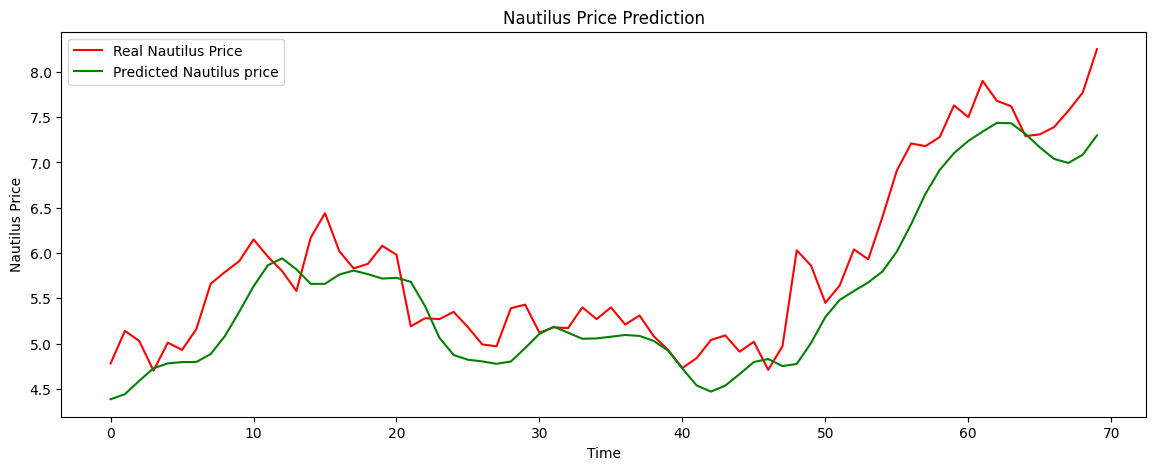

In [28]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1950:], color = 'red', label = 'Real Nautilus Price')
plt.plot(y_pred[1950:], color = 'green', label = 'Predicted Nautilus price')
plt.title('Nautilus Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nautilus Price')
plt.legend()
plt.show()

In [29]:
for i in y_pred[2020:]:
  if y_pred[2020:] < 1.2 * y_test[2020:] & y_pred[2020:] > 0.75 * y_test[2020:]:
    print('1')
  else:
    print('0')
